In [96]:
import re
    
def analyze_license_plate(license_plate):
    
    features = {}
    
    let2num = {
        "A": 1,
        "B": 2,
        "E": 3,
        "K": 4,
        "M": 5,
        "H": 6,
        "O": 7,
        "P": 8,
        "C": 9,
        "T": 10,
        "Y": 11,
        "X": 12,
    }
    # Разделение номера на части
    letter1 = license_plate[0]
    digits = license_plate[1:4]
    letter2 = license_plate[4:6]
    region = license_plate[6:]
    letters = letter1 + letter2

    # То что выводит в таблицу
    features['letter1'] = let2num[letter1]
    features['letter2'] = let2num[letter2[0]]
    features['letter3'] = let2num[letter2[1]]

    
    #Зеркальные буквы
    features["letters_is_mirror"] = 1 if len(letter2) == 2 else 0

    # Повторяющиеся буквы
    features['repeated_letters'] = 1 if len(letter2) == 2 else 0
    features['triple_letters'] = 1 if len(letter2) == 2 else 0


    # 2.3 Цифровые комбинации
    features['is_mirror_digits'] = 1 if digits[0] == digits[2] else 0
    features['is_round_digits'] = 1 if digits in ("100", "200", "300", "400", "500", "600", "700", "800", "900") else 0
    features['repeated_digits'] = 1 if len(set(digits)) == 1 else 0
    features['ascending_digits'] = 1 if digits == ''.join(map(str, range(int(digits[0]), int(digits[0]) + 3))) else 0
    features['descending_digits'] = 1 if digits == ''.join(map(str, range(int(digits[0]), int(digits[0]) - 3, -1))) else 0

    #чередующийся порядок цифр
    features["alternating_digits"] = digits[0] == digits[2] and digits[1] != digits[0]

    features['sum_of_digits'] = sum(int(d) for d in digits)
    features['even_digits'] = sum(1 for d in digits if int(d) % 2 == 0)
    features['odd_digits'] = sum(1 for d in digits if int(d) % 2 != 0)
    features['has_7'] = 1 if '7' in digits else 0
    features['has_8'] = 1 if '8' in digits else 0


    happy_numbers = ['777', '888', '007']
    features['is_happy_number'] = 1 if digits in happy_numbers else 0


    features["digits_match_region"] = 1 if (len(region) == 3 and digits == region) else 0

    
    prestigious_regions = ["77", "99", "199", "777", "78", "98"]
    features["is_prestigious_region"] = 1 if region in prestigious_regions else 0


    prestigious_letters = ['A', 'M', 'B', 'O', 'P', 'C']
    letter_prestige = 0
    if letter1 in prestigious_letters:
        letter_prestige += 1
    for letter in letter2:
        if letter in prestigious_letters:
            letter_prestige += 1
    features['letter_prestige'] = letter_prestige


    even_count = sum(1 for digit in digits if int(digit) % 2 == 0)
    odd_count = 3 - even_count
    features["even_digit_count"] = even_count
    features["odd_digit_count"] = odd_count


    blat_series = {
          "77": ["EKX", "KKX", "CAC", "AMP", "AMM", "CCC", "KKK", "OOO", "*MM", "KMM", "MMP", "PMP", "AM0", "K00"],
          "99": ["EKX", "AMM", "CCC", "KKK"],
          "97": ["EKX", "CCC"],
          "50": ["AM", "BM", "KMO", "CM", "OMO", "MM", "TM", "HM", "YMO", "XM", "AMM", "MMM"],
          "90": ["AMM", "MMM"],
          "78": ["OB", "OTT", "OMM", "00M", "OPP", "OOH", "OA", "AAA", "000", "OKC", "00C", "BBB", "MMM", "OCX"],
          "98": ["OB", "OTT", "OMM", "00M", "OPP", "OOH", "OA", "AAA", "000", "OKC", "00C", "BBB", "MMM", "OCX"],
          "04": ["XXX", "TTT", "PPP", "PPA", "MPA", "000", "HHH", "CCC"],
          "02": ["PKC", "KKC", "000", "AAA"],
          "10": ["TTT", "HHH", "MMM", "EMP", "CCC", "000"],
          "11": ["TTT", "PPP", "AAA"],
          "MM": ["*MM", "KM"],
          "23": ["PPP", "HHH", "000", "KKK"],
          "24": ["KPK", "000", "MKK"],
          "25": ["B00", "AAA", "AAA1", "HHH", "MMM", "CCC", "XXX", "000", "TTT", "MBK", "BOO", "HOO", "YOO", "COO"],
          "125": ["AAA"],
          "34": ["AAM", "PAA", "AAA", "ACK", "YYY", "AAK"],
          "36": ["AAA", "BOA", "MMM", "AAK", "KKK", "PPP"],
          "40": ["MAA", "000", "TTT", "PPP"],
          "45": ["000", "TTT", "OKO"],
          "54": ["ACK", "AHO", "AAO", "PPP", "MOP"],
          "57": ["AAA", "AOO", "MAA", "MMMOBD", "OAO"],
          "61": ["APO", "AAA", "APY", "KKK", "HHH", "MMM", "000", "BBK"],
          "64": ["AAA", "PPP", "XXX", "MMM", "OAA"],
          "70": ["ATO"],
          "72": ["PTO", "ATO", "MTO", "HTO"],
          "76": ["YTO", "BAA", "BOA", "KKK"],
          "29": ["TTT", "PPP", "MAO"],
          "62": ["C62", "M62", "X62", "APO"],
          "63": ["PAA", "AAP"],
          "любые регионы": [
            "OOO", "AAA", "MMM", "BBB", "EEE", "KKK", "HHH", "PPP", "CCC", "TTT", "YYY", "XXX",
            "AMP", "AMO", "KMM", "MBM", "CBB", "EKX", "CAC", "MMB", "BMB", "BMR", "KMR", "HMP",
            "AYE", "YMP", "KPY", "BPY", "CPY", "EPY", "XAM", "MYP", "HLO", "AYY", "BAO", "EAO",
            "KAO", "MAO", "HAO", "PAO", "CAO", "TAO", "YAO", "XAO", "KOT", "BOX", "MOP", "TOP",
            "XYM", "EMA", "EKL", "ABM", "BMM", "MBK", "HBB", "KBB"]
        }
    

    features["is_blatnoy"] = 0

    if region in blat_series:
        for series in blat_series[region]:


            if series == letters:
                features["is_blatnoy"] = 1
                break


            if len(series) == 3 and (letter1 + digits[:2]) == series[:3]:
               features["is_blatnoy"] = 1
               break

            if len(series) == 3 and digits == "000" and letter1 == series[0]:
                 features["is_blatnoy"] = 1
                 break


    return features

In [97]:
import pandas as pd
import numpy as np

In [98]:
df = pd.read_csv("train.csv")

In [99]:
df

,id,plate,date,price
0,1,X059CP797,2024-12-26 00:00:00,65000
1,2,Y800MH790,2024-07-12 21:31:37,100000
2,3,A212TX77,2024-04-18 00:00:00,290000
3,4,P001AY199,2025-01-03 00:27:15,680000
4,5,P001AY199,2025-01-10 09:32:41,750000
...,...,...,...,...
51630,51631,X023PP797,2025-01-29 00:00:00,70000
51631,51632,M004KA161,2025-01-31 00:00:00,1600000
51632,51633,E888EB199,2025-02-06 00:00:00,850000
51633,51634,X023XK77,2024-04-24 11:30:07,150000


In [100]:
for i in range(len(df)):
    plate = df.iloc[i]["plate"]
    features = analyze_license_plate(plate)
    for key, value in features.items():
        df.at[i, key] = value

In [101]:
df = df.drop(['plate', 'date', 'id'], axis=1)
df

,price,letter1,letter2,letter3,letters_is_mirror,repeated_letters,triple_letters,is_mirror_digits,is_round_digits,repeated_digits,...,odd_digits,has_7,has_8,is_happy_number,digits_match_region,is_prestigious_region,letter_prestige,even_digit_count,odd_digit_count,is_blatnoy
0,65000,12.0,9.0,8.0,1.0,1.0,1.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0
1,100000,11.0,5.0,6.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0
2,290000,1.0,10.0,12.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0
3,680000,8.0,1.0,11.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0
4,750000,8.0,1.0,11.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51630,70000,12.0,8.0,8.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0
51631,1600000,5.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0
51632,850000,3.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,3.0,0.0,0.0
51633,150000,12.0,12.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0


In [102]:
y = df["price"]
X = df.drop(columns=["price"])

In [103]:
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import PolynomialFeatures


from sklearn.preprocessing import StandardScaler, MinMaxScaler

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [118]:
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [119]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

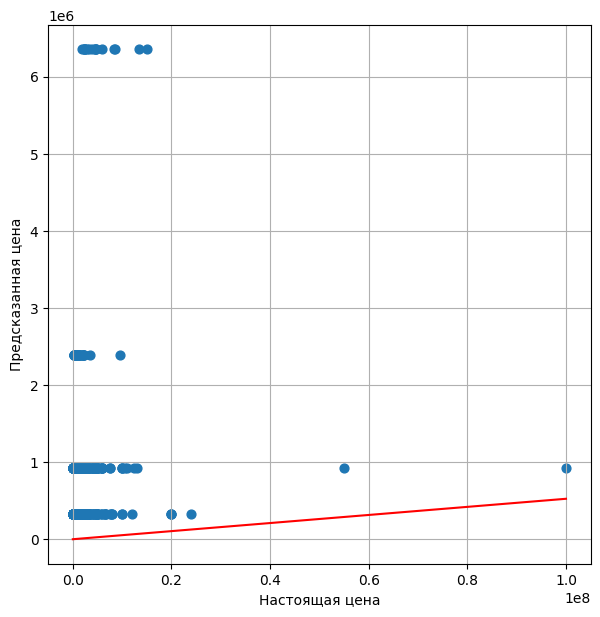

In [120]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_1, s = 40) # рисуем точки, соответствущие парам настоящее значение - прогноз # edgecolors = 'k'
plt.plot([0, max(y_test)], [0, max(test_preds)], color = 'Red')  # рисуем прямую, на которой предсказания и настоящие значения совпадают
# plt.plot([1::2], [1::2].reshape(-1, 1).dot(w) + b, label='Предсказанное')
plt.xlabel('Настоящая цена')
plt.ylabel('Предсказанная цена')
# plt.ylims()
plt.grid(True)
plt.show()

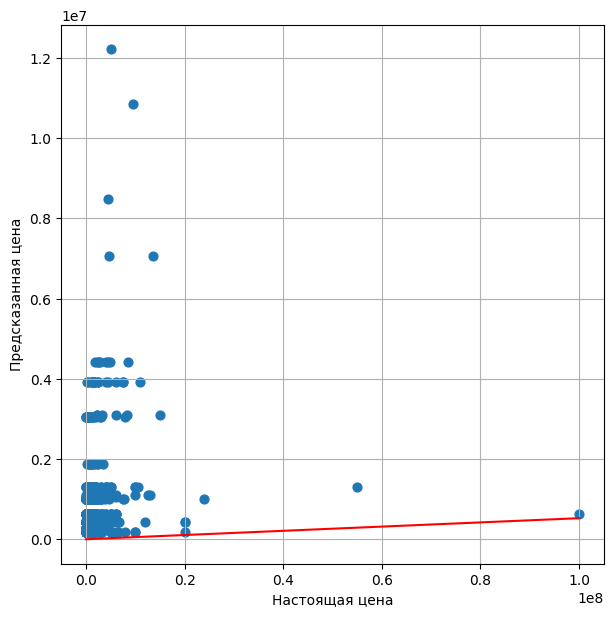

In [121]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_2, s = 40) # рисуем точки, соответствущие парам настоящее значение - прогноз # edgecolors = 'k'
plt.plot([0, max(y_test)], [0, max(test_preds)], color = 'Red')  # рисуем прямую, на которой предсказания и настоящие значения совпадают
# plt.plot([1::2], [1::2].reshape(-1, 1).dot(w) + b, label='Предсказанное')
plt.xlabel('Настоящая цена')
plt.ylabel('Предсказанная цена')
# plt.ylims()
plt.grid(True)
plt.show()

In [114]:
## XGBoost

In [144]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils.fixes import parse_version

In [ ]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

y_1 = reg.predict(X_test)

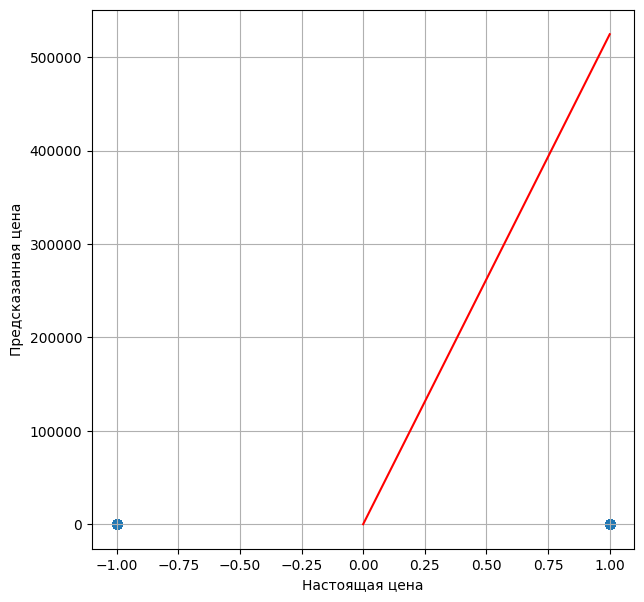

In [164]:
boost = plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_1, s = 40)
plt.plot([0, max(y_test)], [0, max(test_preds)], color = 'Red')
plt.xlabel('Настоящая цена')
plt.ylabel('Предсказанная цена')
plt.grid(True)
plt.show()